In [215]:
import pandas as pd

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale





**Load The Data**

In [216]:
df = pd.read_csv('housing_data_cleaned.csv')

In [217]:
df.head()


,Unnamed: 0,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,...,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession,diff_List_Sold
0,0,85003,AF,1,1.0,720,340.28,Stacked,1964,652,...,Yes,Yes,0.0,1.0,Conventional,Fixed,0,0.0,7410.00,-2000
1,1,85003,LS,1,1.0,755,430.46,Stacked,2005,751,...,Yes,Yes,0.0,0.0,VA,Fixed,0,0.0,0.00,-10000
2,2,85003,SF,4,3.0,3415,439.23,Detached,1940,11696,...,Yes,Yes,2.0,0.0,Conventional,Fixed,0,0.0,0.00,-95000
3,3,85003,AF,1,1.0,710,436.61,Stacked,2005,0,...,Yes,Yes,0.0,0.0,Conventional,Adjustable,0,0.0,6000.00,-5000
4,4,85003,AF,2,2.5,1510,314.56,Stacked,2007,654,...,No,Yes,2.0,0.0,Conventional,Fixed,0,0.0,17621.25,5100


In [218]:
# setting zipcode as new index
df_newind = df.set_index('Zip_Code')

In [219]:
# The most expensive sold property is in Phoenix,Arizona zipcode 85018
df_newind.Sold_Price.sort_values(ascending=False).head()

Zip_Code
85018    10364000
85253     9391112
85016     7626000
85377     6295000
85018     5800000
Name: Sold_Price, dtype: int64

In [220]:
# The most expensive price per square foot is in Scottsdale Arizona, zipcode 85254
df_newind.Price_per_SqFt.sort_values(ascending=False).head()

Zip_Code
85254    1433.69
85253    1381.05
85251    1376.23
85018    1304.14
85251    1300.47
Name: Price_per_SqFt, dtype: float64

In [221]:
# The largest [Sqft] home was sold in Scottsdale, Arizona, zipcode 85260
df_newind.Approx_SQFT.sort_values(ascending=False).head()

Zip_Code
85260    8151
85260    8151
85018    7947
85016    7750
85016    7610
Name: Approx_SQFT, dtype: int64

In [222]:
df_newind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 85003 to 85541
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3117 non-null   int64  
 1   Dwelling_Type       3117 non-null   object 
 2   Nr_Bedrooms         3117 non-null   int64  
 3   Nr_Bathrooms        3117 non-null   float64
 4   Approx_SQFT         3117 non-null   int64  
 5   Price_per_SqFt      3117 non-null   float64
 6   Dwelling_Styles     3117 non-null   object 
 7   Year_Built          3117 non-null   int64  
 8   Approx_Lot_SqFt     3117 non-null   int64  
 9   Pool                3117 non-null   object 
 10  HOA_Fee             2200 non-null   float64
 11  Land_Lease_Fee      3117 non-null   object 
 12  Clubhouse_Rec_Room  3117 non-null   object 
 13  Basement            3117 non-null   object 
 14  RV_Gate             3117 non-null   object 
 15  List_Price          3117 non-null   int64  
 16  Sold_P

In [223]:
# tips:  maybe zipcodes need some type of weight average coefficient to account for different housing prices, i.e. rich 
# vs not so rich zipcodes. ie.: Paradise Valley median home price is in the millions. 

In [224]:
# Most of real estate sales are SF-Single-Family type followed by TH-Town homes, AF-apartment/flat style, 
# MM-Manufactured/Mobile homes, PH-patio homes, LS-Loft style, GT-Gemini/Twin homes, and MD-Modular/prefab homes.

df['Dwelling_Type'].value_counts()

Dwelling_Type
SF    2308
TH     330
AF     239
MM     177
PH      56
LS       3
GT       3
MD       1
Name: count, dtype: int64

## Exploring the data - visualizing features distributions

In [225]:
agg_functions = {'Sold_Price': ['min','mean','max', 'count']}
df_newind.groupby(['Zip_Code']).agg(agg_functions)


Sold_Price                              
                min           mean      max count
Zip_Code                                         
85003        245000  575833.333333  1500000     6
85004        505000  545666.666667   575000     6
85006        320000  464755.555556   599900     9
85007        304000  848600.000000  1845000     5
85008        200000  388708.695652   715000    23
...             ...            ...      ...   ...
85378         67000  226214.285714   371500    14
85379        280000  456703.173077   875000    52
85395        380000  545714.285714   745000     7
85396        335000  512646.695652  1185000    92
85541        299000  299000.000000   299000     1

[88 rows x 4 columns]

In [226]:
# subsetting the df_newind, and sorting by Sold_Price
df_zipcode = df_newind[['Sold_Price','Seller_Concession','Buyer_Concession','Price_per_SqFt','Approx_SQFT','Year_Built','Dwelling_Type','Nr_Bedrooms', 'Nr_Bathrooms']]  

df_zipcode.sort_values(by='Sold_Price')   # Index column is Zip_Code

# Sold_Price


,Sold_Price,Seller_Concession,Buyer_Concession,Price_per_SqFt,Approx_SQFT,Year_Built,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms
Zip_Code,,,,,,,,,
85120,10000,0.0,0.0,16.42,609,1973,MM,1,1.0
85204,14500,0.0,0.0,14.16,1024,1975,MM,2,1.0
85207,18000,0.0,0.0,45.00,400,1995,MM,1,2.0
85207,20000,0.0,0.0,25.51,784,1979,MM,2,1.5
85225,21000,0.0,0.0,21.42,980,1975,MM,2,2.0
...,...,...,...,...,...,...,...,...,...
85018,5800000,0.0,0.0,1052.63,5510,2010,SF,5,4.5
85377,6295000,0.0,0.0,1165.74,5400,1962,SF,4,4.5
85016,7626000,0.0,0.0,1002.10,7610,2018,SF,5,6.0


In [227]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


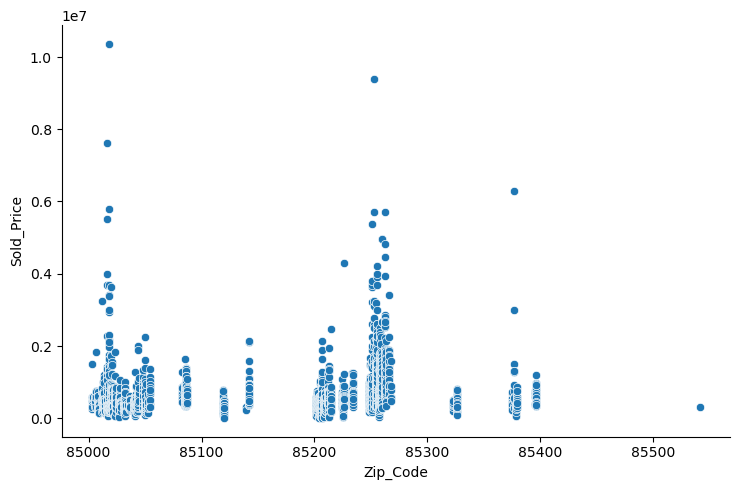

In [228]:
sns.relplot(x=df_zipcode.index, y = df_zipcode['Sold_Price'], kind = 'scatter', 
            height = 5, aspect =1.5)
plt.xticks(rotation = 0)
plt.show()

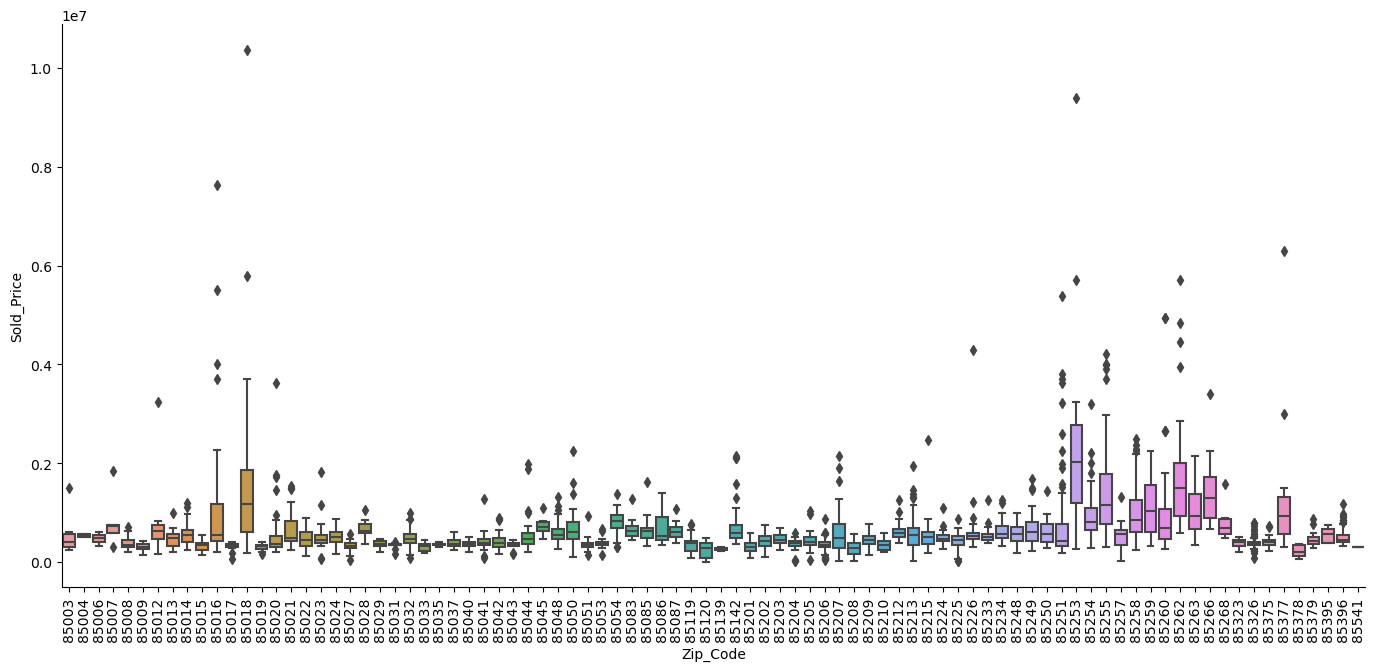

In [229]:
g = sns.catplot(x = df_newind.index, y = 'Sold_Price', 
               data = df_zipcode,
               kind = 'box', height=7, aspect=2)
plt.xticks(rotation = 90)
plt.show()

In [230]:
# zipcode 85326 has most properties sold in March 2024
# shows how many data we have to work with, for each zipcode. Zipcodes with only few data points are useless. 
# therefore predicting sale price per zipcode is not feasible. Predicting a Sale price based on all other variables would be 
# the new objective
df['Zip_Code'].value_counts()  # I used df because I could use 'Zip_Code'as a column, rather than as an index

Zip_Code
85326    123
85142     98
85396     92
85207     83
85251     80
        ... 
85004      6
85003      6
85007      5
85139      2
85541      1
Name: count, Length: 88, dtype: int64

In [231]:
df_newind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 85003 to 85541
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3117 non-null   int64  
 1   Dwelling_Type       3117 non-null   object 
 2   Nr_Bedrooms         3117 non-null   int64  
 3   Nr_Bathrooms        3117 non-null   float64
 4   Approx_SQFT         3117 non-null   int64  
 5   Price_per_SqFt      3117 non-null   float64
 6   Dwelling_Styles     3117 non-null   object 
 7   Year_Built          3117 non-null   int64  
 8   Approx_Lot_SqFt     3117 non-null   int64  
 9   Pool                3117 non-null   object 
 10  HOA_Fee             2200 non-null   float64
 11  Land_Lease_Fee      3117 non-null   object 
 12  Clubhouse_Rec_Room  3117 non-null   object 
 13  Basement            3117 non-null   object 
 14  RV_Gate             3117 non-null   object 
 15  List_Price          3117 non-null   int64  
 16  Sold_P

In [232]:
# Mean Sold_Price throughout Maricopa county is $635,269

df_newind['Sold_Price'].describe()

count    3.117000e+03
mean     6.352639e+05
std      6.138111e+05
min      1.000000e+04
25%      3.600000e+05
50%      4.750000e+05
75%      6.808880e+05
max      1.036400e+07
Name: Sold_Price, dtype: float64

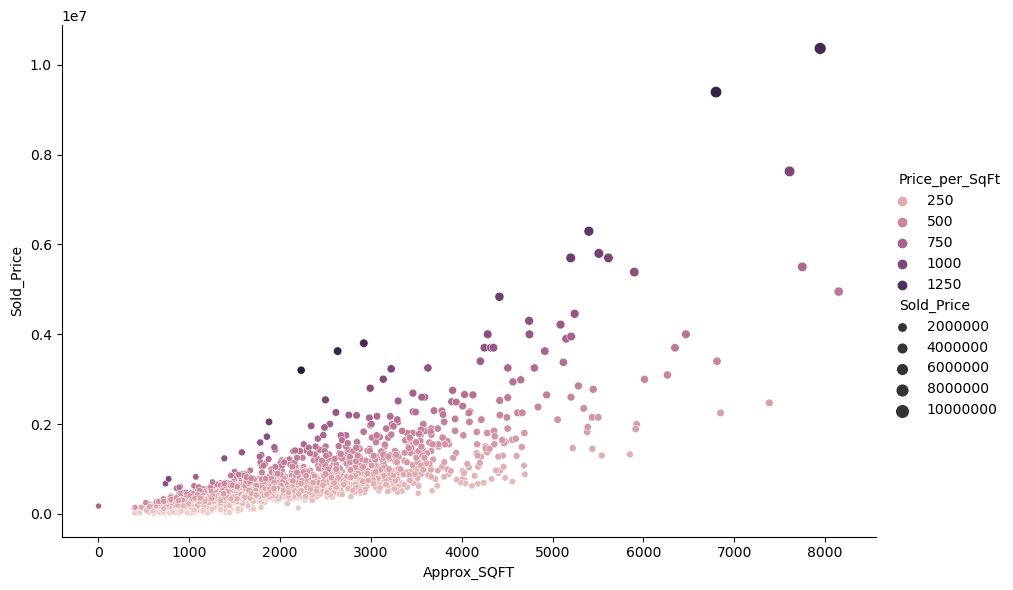

In [233]:
# Sold_Price is positively correlated with Approx_SQFT

sns.relplot(x='Approx_SQFT', y='Sold_Price', data=df_newind, kind='scatter',
            hue='Price_per_SqFt', size = 'Sold_Price',height=6, aspect=1.5)
plt.show()

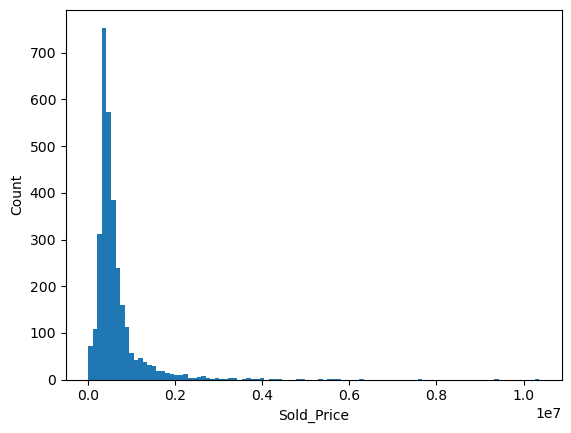

In [234]:
# Sold_Price display a right skewed histogram, also called a positively skewed histogram, which challenges the assumption
# of normality. Logarithmic transformation can be used to minimize the impact of extreme values

_ = plt.hist(df_newind['Sold_Price'], bins=100)
_ = plt.xlabel('Sold_Price')
_=plt.ylabel('Count')
plt.show()

In [235]:
# adding a column "Sold_Price_log" to df containing np.log('Sold_Price')

df_newind['Sold_Price_log'] = np.log(df_newind['Sold_Price'])

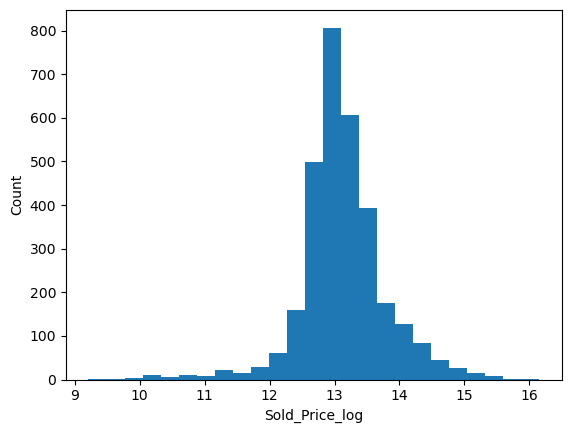

In [236]:
# Sold_Price is now normally distributed
_ = plt.hist(df_newind['Sold_Price_log'], bins=25)
_ = plt.xlabel('Sold_Price_log')
_=plt.ylabel('Count')
plt.show()

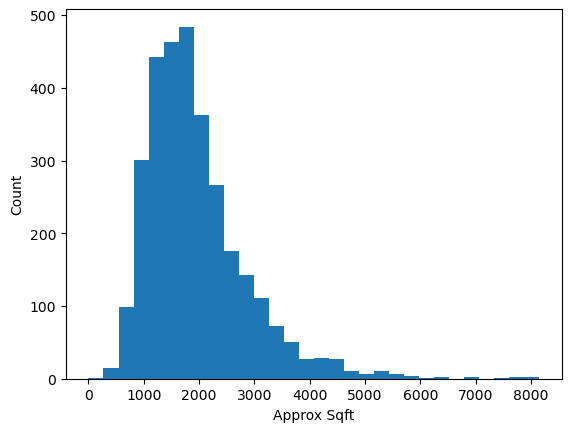

In [237]:
# Approx_SQFT displays a right skewed histogram, also called a positively skewed histogram, which challenges the assumption
# of normality. Logarithmic transformation  can be used to minimize the impact of extreme values

_ = plt.hist(df_newind['Approx_SQFT'], bins=30)
_ = plt.xlabel('Approx Sqft')
_=plt.ylabel('Count')
plt.show()

In [238]:
# adding a column "Approx_SQFT_log" to df containing np.log('Approx_SQFT')

df_newind['Approx_SQFT_log'] = np.log(df_newind['Approx_SQFT'])

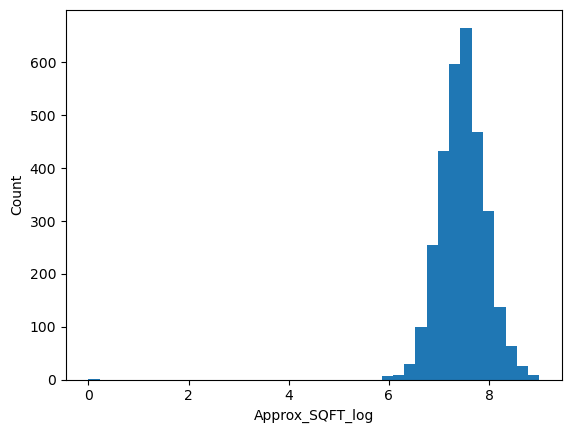

In [239]:
# Approc_SQFT_log is now normally distributed
_ = plt.hist(df_newind['Approx_SQFT_log'], bins=40)
_ = plt.xlabel('Approx_SQFT_log')
_=plt.ylabel('Count')
plt.show()

In [240]:
# filter df for rows where Sold_Price is between $400,000 and $600,000 and groupby zipcode, Approx_SQFT and Price_per_SqFt

df_newind[(df_newind.Sold_Price < 600000) & (df_newind.Sold_Price > 400000)].groupby('Zip_Code')[['Sold_Price', 'Approx_SQFT','Price_per_SqFt']].value_counts()

Zip_Code  Sold_Price  Approx_SQFT  Price_per_SqFt
85003     475000      1510         314.56            1
85004     505000      1456         346.84            2
          575000      1624         354.06            2
          557000      1463         380.72            2
85006     410000      1170         350.42            1
                                                    ..
85396     440000      1854         237.32            1
                      2207         199.36            1
                      2658         165.53            1
          449250      1858         241.79            1
          589990      2835         208.11            1
Name: count, Length: 970, dtype: int64

In [241]:
# filter df for rows where Sold_Price is greater than 2000000 and groupby zipcodeApprox_SQFT and Price_per_SqFt

df_newind[(df_newind.Sold_Price > 2000000)].groupby('Zip_Code')[['Sold_Price', 'Approx_SQFT','Price_per_SqFt']].value_counts()

Zip_Code  Sold_Price  Approx_SQFT  Price_per_SqFt
85012     3250000     4508         720.94            1
85016     2274500     3463         656.80            1
          7626000     7610         1002.10           1
          5500000     7750         709.67            1
          4000000     4286         933.27            1
                                                    ..
85263     2150000     5503         390.70            1
85266     3400000     6811         499.19            1
          2250000     4667         482.10            1
85377     3000000     3136         956.63            1
          6295000     5400         1165.74           1
Name: count, Length: 88, dtype: int64

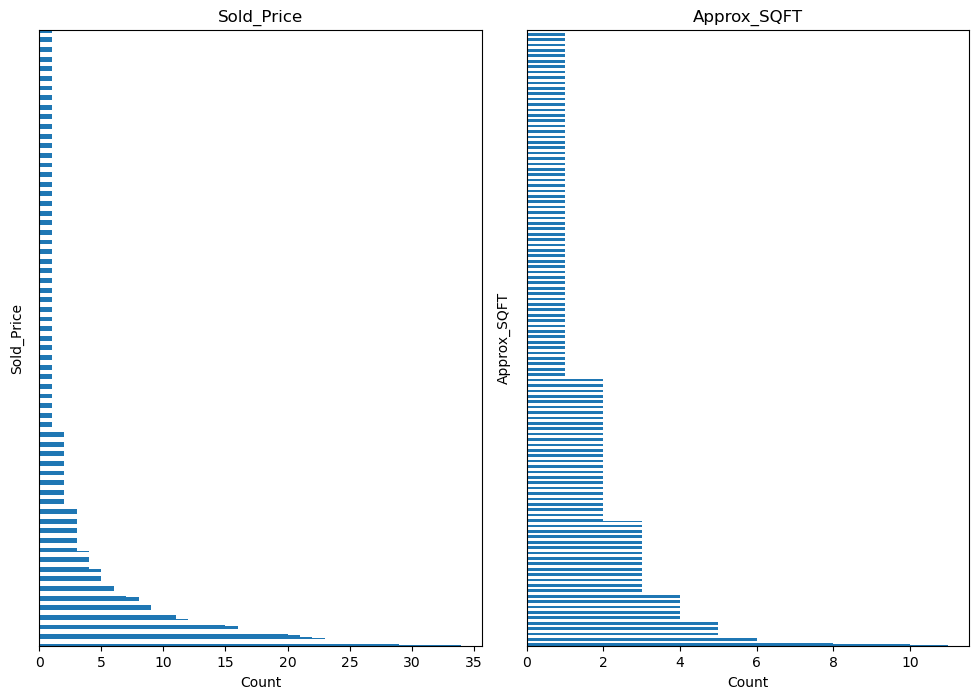

In [242]:


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

df.Sold_Price.value_counts().plot(kind='barh', ax=ax[0])

ax[0].set_title('Sold_Price')

ax[0].set_xlabel('Count')

ax[0].set(yticklabels=[])

ax[0].tick_params(left=False)

df.Approx_SQFT.value_counts().plot(kind='barh', ax=ax[1])

ax[1].set_title('Approx_SQFT')

ax[1].set_xlabel('Count')

ax[1].set(yticklabels=[])

ax[1].tick_params(left=False)

plt.subplots_adjust(wspace=0.1);


In [243]:
# Get mean Sold_Price and Approx_SQFT by zipcode

mean_by_zipcode = df.groupby('Zip_Code')[['Sold_Price', 'Approx_SQFT']].mean()
mean_by_zipcode

,Sold_Price,Approx_SQFT
Zip_Code,,
85003,575833.333333,1333.833333
85004,545666.666667,1514.333333
85006,464755.555556,1344.777778
85007,848600.000000,2126.600000
85008,388708.695652,1339.869565
...,...,...
85378,226214.285714,1086.071429
85379,456703.173077,2046.250000
85395,545714.285714,2195.285714


In [244]:
# Columns Sold_Price_log and Approx_SQFT_log are derived from Sold_Price and Approx_SQFt so I drop them too to avoid redundancy

df_newind.drop(['Sold_Price_log', 'Approx_SQFT_log', 'Buyer_Concession', 'Seller_Concession'], axis=1, inplace=True)

In [245]:
df_newind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 85003 to 85541
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3117 non-null   int64  
 1   Dwelling_Type       3117 non-null   object 
 2   Nr_Bedrooms         3117 non-null   int64  
 3   Nr_Bathrooms        3117 non-null   float64
 4   Approx_SQFT         3117 non-null   int64  
 5   Price_per_SqFt      3117 non-null   float64
 6   Dwelling_Styles     3117 non-null   object 
 7   Year_Built          3117 non-null   int64  
 8   Approx_Lot_SqFt     3117 non-null   int64  
 9   Pool                3117 non-null   object 
 10  HOA_Fee             2200 non-null   float64
 11  Land_Lease_Fee      3117 non-null   object 
 12  Clubhouse_Rec_Room  3117 non-null   object 
 13  Basement            3117 non-null   object 
 14  RV_Gate             3117 non-null   object 
 15  List_Price          3117 non-null   int64  
 16  Sold_P

**Explore the Data**

In [246]:
# Total square footage of housing sold in Maricopa County
total_sqft = df_newind['Approx_SQFT'].sum()
total_sqft

6074474

In [247]:
# total number of real estate properties
nr = len(df_newind)
nr

3117

In [248]:
# mean sqft per house sold in Maricopa County
m_p_sqft = total_sqft/nr
m_p_sqft

1948.820660891883

In [249]:
df_newind.columns

Index(['Unnamed: 0', 'Dwelling_Type', 'Nr_Bedrooms', 'Nr_Bathrooms',
       'Approx_SQFT', 'Price_per_SqFt', 'Dwelling_Styles', 'Year_Built',
       'Approx_Lot_SqFt', 'Pool', 'HOA_Fee', 'Land_Lease_Fee',
       'Clubhouse_Rec_Room', 'Basement', 'RV_Gate', 'List_Price', 'Sold_Price',
       'Building_Style', 'Gated_Community', 'Workout_Facility',
       'Garage_Spaces', 'Carport_Spaces', 'Loan_Type', 'Payment_Type',
       'HOA_Missing', 'diff_List_Sold'],
      dtype='object')

In [250]:
df_newind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 85003 to 85541
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3117 non-null   int64  
 1   Dwelling_Type       3117 non-null   object 
 2   Nr_Bedrooms         3117 non-null   int64  
 3   Nr_Bathrooms        3117 non-null   float64
 4   Approx_SQFT         3117 non-null   int64  
 5   Price_per_SqFt      3117 non-null   float64
 6   Dwelling_Styles     3117 non-null   object 
 7   Year_Built          3117 non-null   int64  
 8   Approx_Lot_SqFt     3117 non-null   int64  
 9   Pool                3117 non-null   object 
 10  HOA_Fee             2200 non-null   float64
 11  Land_Lease_Fee      3117 non-null   object 
 12  Clubhouse_Rec_Room  3117 non-null   object 
 13  Basement            3117 non-null   object 
 14  RV_Gate             3117 non-null   object 
 15  List_Price          3117 non-null   int64  
 16  Sold_P

In [260]:
# dropping all non-numerical columns

df_newind.drop(['Dwelling_Type','Dwelling_Styles','Pool','Land_Lease_Fee','Clubhouse_Rec_Room','Basement','RV_Gate','Building_Style','Gated_Community','Workout_Facility','Loan_Type','Payment_Type'], axis=1,inplace=True)

In [261]:
print(type(df_newind))

<class 'pandas.core.frame.DataFrame'>


In [262]:
df_newind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 85003 to 85541
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3117 non-null   int64  
 1   Nr_Bedrooms      3117 non-null   int64  
 2   Nr_Bathrooms     3117 non-null   float64
 3   Approx_SQFT      3117 non-null   int64  
 4   Year_Built       3117 non-null   int64  
 5   Approx_Lot_SqFt  3117 non-null   int64  
 6   HOA_Fee          2200 non-null   float64
 7   List_Price       3117 non-null   int64  
 8   Sold_Price       3117 non-null   int64  
 9   Garage_Spaces    3117 non-null   float64
 10  Carport_Spaces   3117 non-null   float64
 11  HOA_Missing      3117 non-null   int64  
 12  diff_List_Sold   3117 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 405.5 KB


In [316]:
# the Price_per_SqFt column is a value derived from Sold_Price and Approx_SQFT. Therefore, I drop Price_perSqFt column
# df_newind.drop('Price_per_SqFt', axis=1, inplace=True)

In [317]:
df_newind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 85003 to 85541
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3117 non-null   int64  
 1   Nr_Bedrooms      3117 non-null   int64  
 2   Nr_Bathrooms     3117 non-null   float64
 3   Approx_SQFT      3117 non-null   int64  
 4   Year_Built       3117 non-null   int64  
 5   Approx_Lot_SqFt  3117 non-null   int64  
 6   HOA_Fee          3117 non-null   float64
 7   List_Price       3117 non-null   int64  
 8   Sold_Price       3117 non-null   int64  
 9   Garage_Spaces    3117 non-null   float64
 10  Carport_Spaces   3117 non-null   float64
 11  HOA_Missing      3117 non-null   int64  
 12  diff_List_Sold   3117 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 405.5 KB


In [318]:
df_with_nan = df_newind[df_newind.isna().any(axis=1)]

In [319]:
print(df_with_nan)

Empty DataFrame
Columns: [Unnamed: 0, Nr_Bedrooms, Nr_Bathrooms, Approx_SQFT, Year_Built, Approx_Lot_SqFt, HOA_Fee, List_Price, Sold_Price, Garage_Spaces, Carport_Spaces, HOA_Missing, diff_List_Sold]
Index: []


In [320]:
# there are 917 rows of data with NaN values in HOA_Fee column.
df_newind['HOA_Fee'].isna().sum()

0

In [321]:
# replace NaN values in the ‘HOA_Fee’ column with 0.

df_newind['HOA_Fee'].fillna(0, inplace=True)

In [322]:
df_newind['HOA_Fee'].isna().sum()  # check for Nan  (the PCA components transformation does not work if dataframe contains Nan)

0

**Visualizing High Dimensional Data**

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

**1. Scaling the data**

In [323]:
#Code task 1#
#Create a new dataframe, `df_scale` from `df` whilst setting the index to 'zipcode'
df_scale = df_newind
#Save the zipcode labels (using the index attribute of `df_scale`) into the variable 'df_index'
df_index = df_scale.index
#Save the column names (using the `columns` attribute) of `df_scale` into the variable 'df_columns'
df_columns = df_scale.columns
df_scale.head()

,Unnamed: 0,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Year_Built,Approx_Lot_SqFt,HOA_Fee,List_Price,Sold_Price,Garage_Spaces,Carport_Spaces,HOA_Missing,diff_List_Sold
Zip_Code,,,,,,,,,,,,,
85003,0,1,1.0,720,1964,652,567.00,247000,245000,0.0,1.0,0,-2000
85003,1,1,1.0,755,2005,751,631.00,335000,325000,0.0,0.0,0,-10000
85003,2,4,3.0,3415,1940,11696,555.63,1595000,1500000,2.0,0.0,0,-95000
85003,3,1,1.0,710,2005,0,671.17,315000,310000,0.0,0.0,0,-5000
85003,4,2,2.5,1510,2007,654,567.93,469900,475000,2.0,0.0,0,5100


In [324]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 85003 to 85541
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3117 non-null   int64  
 1   Nr_Bedrooms      3117 non-null   int64  
 2   Nr_Bathrooms     3117 non-null   float64
 3   Approx_SQFT      3117 non-null   int64  
 4   Year_Built       3117 non-null   int64  
 5   Approx_Lot_SqFt  3117 non-null   int64  
 6   HOA_Fee          3117 non-null   float64
 7   List_Price       3117 non-null   int64  
 8   Sold_Price       3117 non-null   int64  
 9   Garage_Spaces    3117 non-null   float64
 10  Carport_Spaces   3117 non-null   float64
 11  HOA_Missing      3117 non-null   int64  
 12  diff_List_Sold   3117 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 405.5 KB


In [325]:
df_scale = scale(df_scale)
print(df_scale)

[[-1.73149522 -2.1699869  -1.68723771 ...  0.99088416 -0.64561458
   0.21942708]
 [-1.73038386 -2.1699869  -1.68723771 ... -0.48408524 -0.64561458
   0.06379302]
 [-1.7292725   0.90728752  0.87474984 ... -0.48408524 -0.64561458
  -1.58981884]
 ...
 [ 1.7292725  -0.11847062 -0.40624394 ... -0.48408524  1.54891174
   0.21942708]
 [ 1.73038386 -0.11847062 -0.40624394 ... -0.48408524  1.54891174
   0.35560688]
 [ 1.73149522 -0.11847062 -0.40624394 ... -0.48408524  1.54891174
   0.25833559]]


In [326]:
# Note, scale() returns an ndarray, so I lose the column names. Because I want to visualise scaled data, 
# I already copied the column names. Now I can construct a dataframe from the ndarray here and reintroduce the column names.

In [327]:
df_scale_df = pd.DataFrame(df_scale, columns=df_columns)
df_scale_df.head()

,Unnamed: 0,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Year_Built,Approx_Lot_SqFt,HOA_Fee,List_Price,Sold_Price,Garage_Spaces,Carport_Spaces,HOA_Missing,diff_List_Sold
0,-1.731495,-2.169987,-1.687238,-1.330988,-1.429343,-0.027060,0.773138,-0.637657,-0.635907,-1.379464,0.990884,-0.645615,0.219427
1,-1.730384,-2.169987,-1.687238,-1.293078,0.613898,-0.026961,0.920232,-0.497912,-0.505552,-1.379464,-0.484085,-0.645615,0.063793
2,-1.729273,0.907288,0.874750,1.588081,-2.625386,-0.016009,0.747006,1.502990,1.409024,0.252799,-0.484085,-0.645615,-1.589819
3,-1.728161,-2.169987,-1.687238,-1.341819,0.613898,-0.027712,1.012556,-0.529672,-0.529994,-1.379464,-0.484085,-0.645615,0.161064
4,-1.727050,-1.144229,0.234253,-0.475305,0.713568,-0.027058,0.775276,-0.283688,-0.261138,0.252799,-0.484085,-0.645615,0.357552


**Verifying the scaling**

In [328]:
# First of all, check the mean of the scaled features using panda's mean() DataFrame method
df_scale_df.mean()

Unnamed: 0         0.000000e+00
Nr_Bedrooms       -1.367743e-17
Nr_Bathrooms      -2.735487e-17
Approx_SQFT        1.276561e-16
Year_Built         5.142715e-15
Approx_Lot_SqFt    0.000000e+00
HOA_Fee            7.294632e-17
List_Price         5.470974e-17
Sold_Price        -9.118290e-17
Garage_Spaces      5.470974e-17
Carport_Spaces    -3.647316e-17
HOA_Missing        7.294632e-17
diff_List_Sold     1.139786e-17
dtype: float64

In [329]:
# This is pretty much zero!

#v Perform a similar check for the standard deviation using pandas's std() DataFrame method

In [330]:
df_scale_df.std(ddof=0)

Unnamed: 0         1.0
Nr_Bedrooms        1.0
Nr_Bathrooms       1.0
Approx_SQFT        1.0
Year_Built         1.0
Approx_Lot_SqFt    1.0
HOA_Fee            1.0
List_Price         1.0
Sold_Price         1.0
Garage_Spaces      1.0
Carport_Spaces     1.0
HOA_Missing        1.0
diff_List_Sold     1.0
dtype: float64

**2. Calculate the PCA transformation**

In [331]:
# Fit the PCA transformation using the scaled data.

In [332]:
df_pca=PCA().fit(df_scale)
print(df_pca.components_)

[[ 1.31159914e-01  3.13013148e-01  4.05535402e-01  4.35077817e-01
   1.94719627e-01 -9.84701360e-03  4.32178196e-02  3.92759082e-01
   3.90691386e-01  3.43216263e-01 -2.10172345e-01 -2.68220215e-02
  -1.46966000e-01]
 [-4.55802553e-01  8.32615371e-02  9.10764203e-02  9.25815801e-02
  -4.55422210e-01  1.96186944e-03 -2.43909672e-01  2.47821711e-01
   2.34181928e-01 -2.60166533e-01  3.26147114e-01  3.91946901e-01
  -2.40005011e-01]
 [ 1.54029660e-01 -1.94549306e-01 -2.89413530e-02  1.74528567e-02
  -2.42628492e-01  6.19788627e-02  5.93145980e-01  2.02167681e-01
   1.84766453e-01 -2.16637829e-01  2.99924243e-01 -4.87417113e-01
  -2.70700488e-01]
 [ 6.18876888e-02  5.43735926e-02 -3.75722753e-03  1.04317030e-02
  -1.03461955e-02  9.93115116e-01 -6.98420517e-02 -1.03024805e-02
  -7.90364530e-03  2.46246454e-03  8.22527278e-03  2.39014338e-02
   3.18479776e-02]
 [-3.76856587e-01  4.66192763e-01  1.81717433e-01  1.43312836e-01
  -2.23724547e-01 -3.87737818e-03  2.45066126e-01 -1.57411681e-01


In [333]:
print(df_pca.explained_variance_ratio_)

[3.51716398e-01 1.26674265e-01 1.07823039e-01 7.70146914e-02
 6.86022480e-02 6.42108482e-02 5.67807124e-02 4.79160935e-02
 4.46827073e-02 2.69381703e-02 1.87820147e-02 8.85881103e-03
 1.78943123e-31]


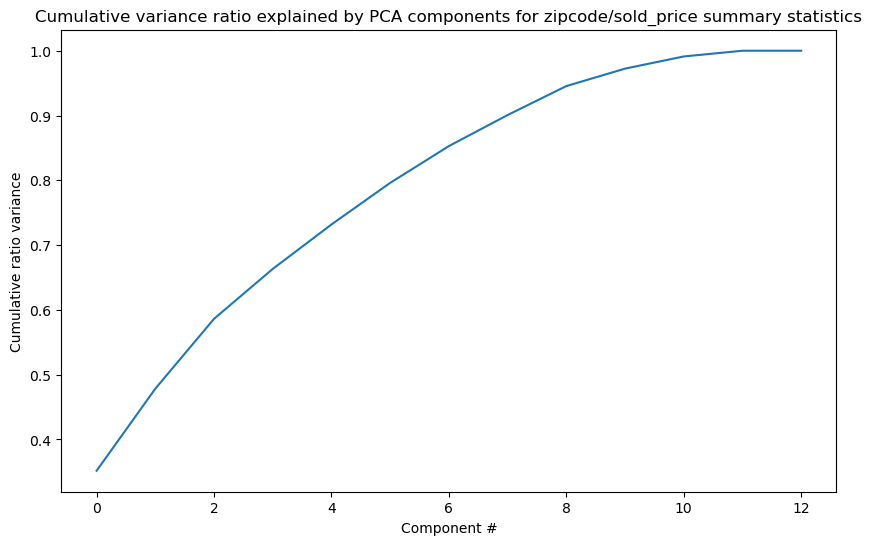

In [334]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(df_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for zipcode/sold_price summary statistics');

In [335]:
# The first four components seem to account for over 75% of the variance, and the first eight for over 95%

In [336]:
# Apply the transformation to the data to obtain the derived features.

In [337]:
df_pca_x = df_pca.transform(df_scale)
print(df_pca_x)

[[-3.60982771e+00  8.63387406e-01  1.58968629e+00 ... -8.98191400e-02
  -2.76924909e-01 -1.92095896e-16]
 [-2.75028772e+00 -4.78569423e-01  8.34112884e-01 ...  3.30720009e-01
  -3.98153770e-01  4.02358773e-16]
 [ 2.20436869e+00  2.71117743e+00  1.74790389e+00 ... -2.93190112e-01
  -3.60339376e-01  1.00016601e-15]
 ...
 [-8.88544008e-02 -9.58233818e-01 -1.37787047e+00 ...  1.75322017e-01
  -5.10290730e-02  6.29084549e-17]
 [-1.14880701e+00 -4.56741370e-01 -9.83681259e-01 ...  1.02468432e-01
   2.27459001e-01 -3.97250995e-16]
 [-1.12383886e+00 -3.85291571e-01 -9.62562579e-01 ... -8.75791771e-03
   3.44748764e-03 -4.44091508e-16]]


In [338]:
df_pca_x.shape

(3117, 13)

In [339]:
# Plot the first four derived features (the first four principle components) and label each point with the zipcode

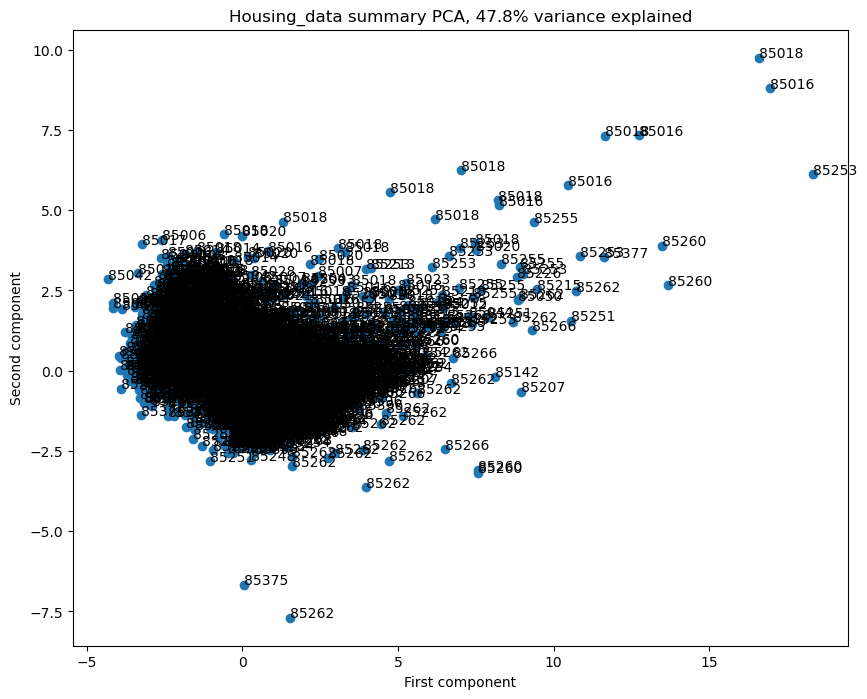

In [340]:
x = df_pca_x[:, 0]
y = df_pca_x[:, 1]
df = df_index
pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]  # pc_var = percent variance explained
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Housing_data summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(df, x, y):
    plt.annotate(s, (x, y))

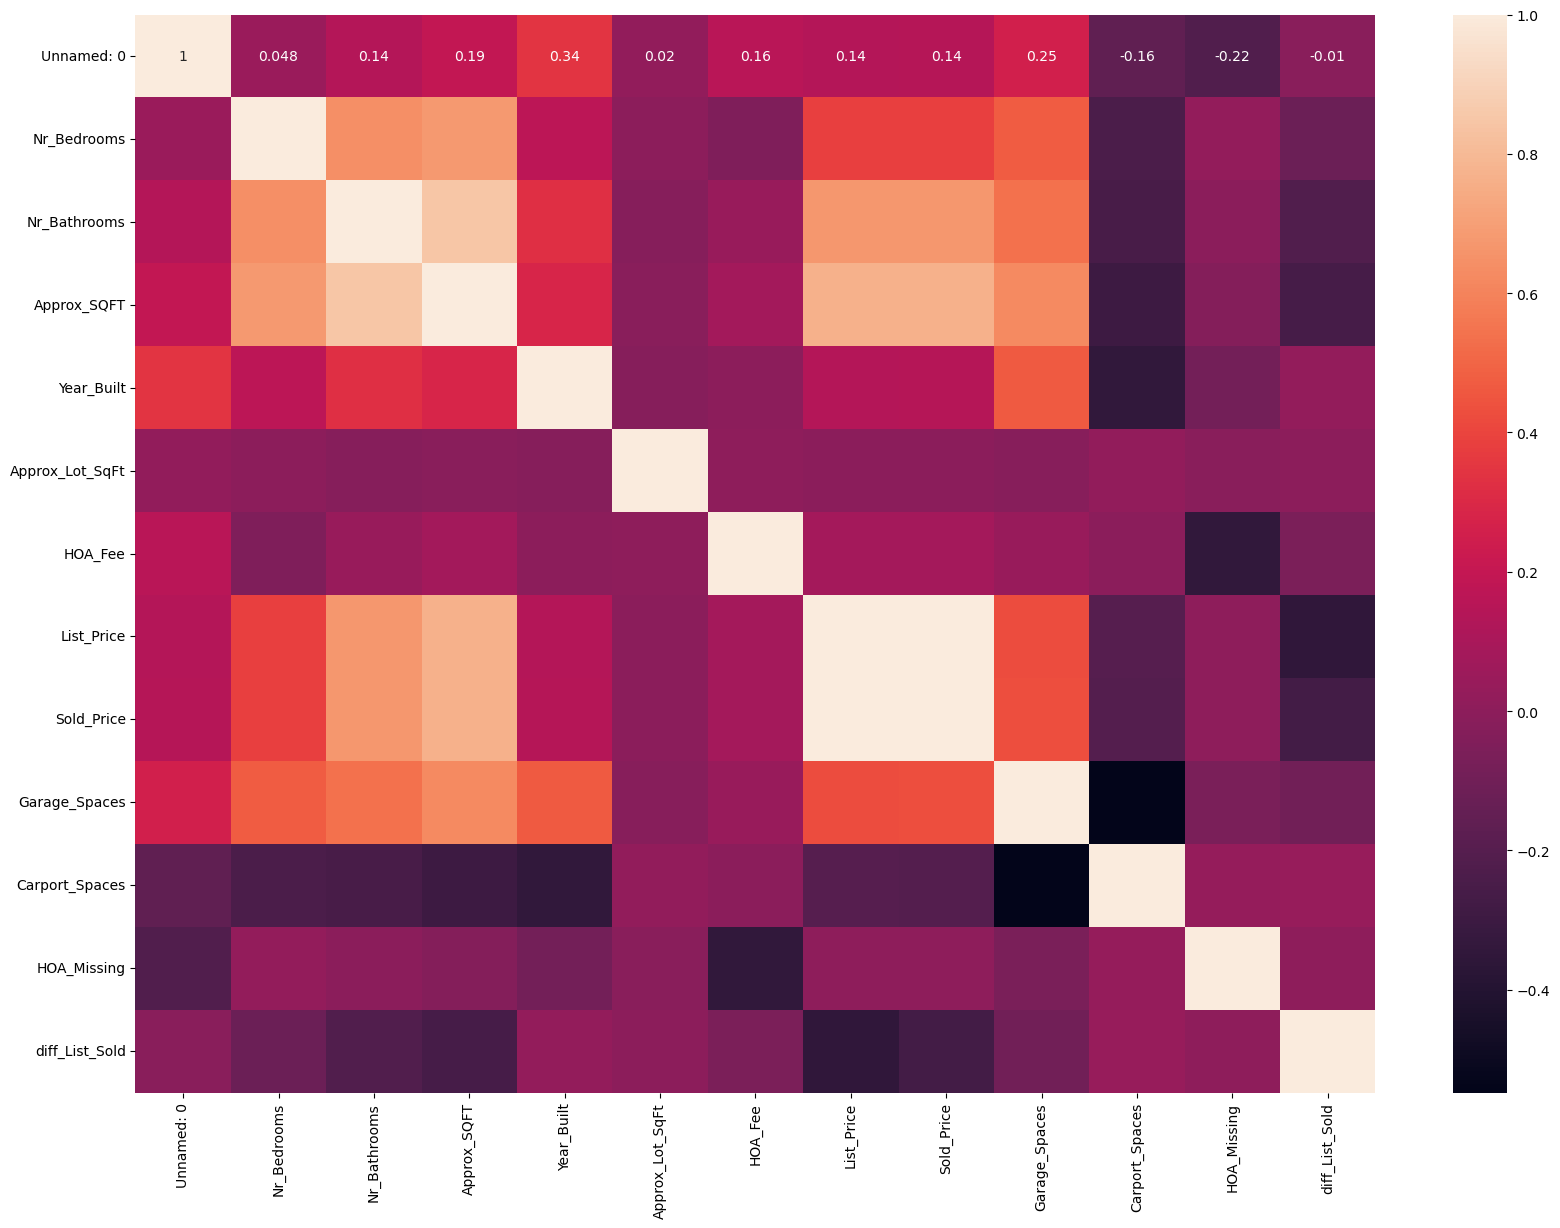

In [341]:
# seaborn heatmap of correlations in df_newind data

plt.subplots(figsize=(20,14))

sns.heatmap(df_newind.corr(), annot=True);

In [342]:
# Sold price is stronger correlated with 'Nr of Bedrooms, Nr of Bathrooms, Approx_SQFt, didd_list_sold'

In [343]:
# define useful function to create scatterplots of Sold_Price against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Sold_Price', data=df_newind, alpha=0.4)
        ax.set(xlabel=col, ylabel='Sold_Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [344]:
# Use list comprehension to build a list of features from the columns of `df_newind` that
# are _not_ any of 'HOA_Missing', 'Approx_Lot_SqFt', 'Year_Built', 'Carport_Spaces', or 'HOA_Fee'
features = [col for col in df_newind.columns if col not in ['HOA_Missing', 'Approx_Lot_SqFt', 'Year_Built', 'Carport_Spaces','HOA_Fee']]

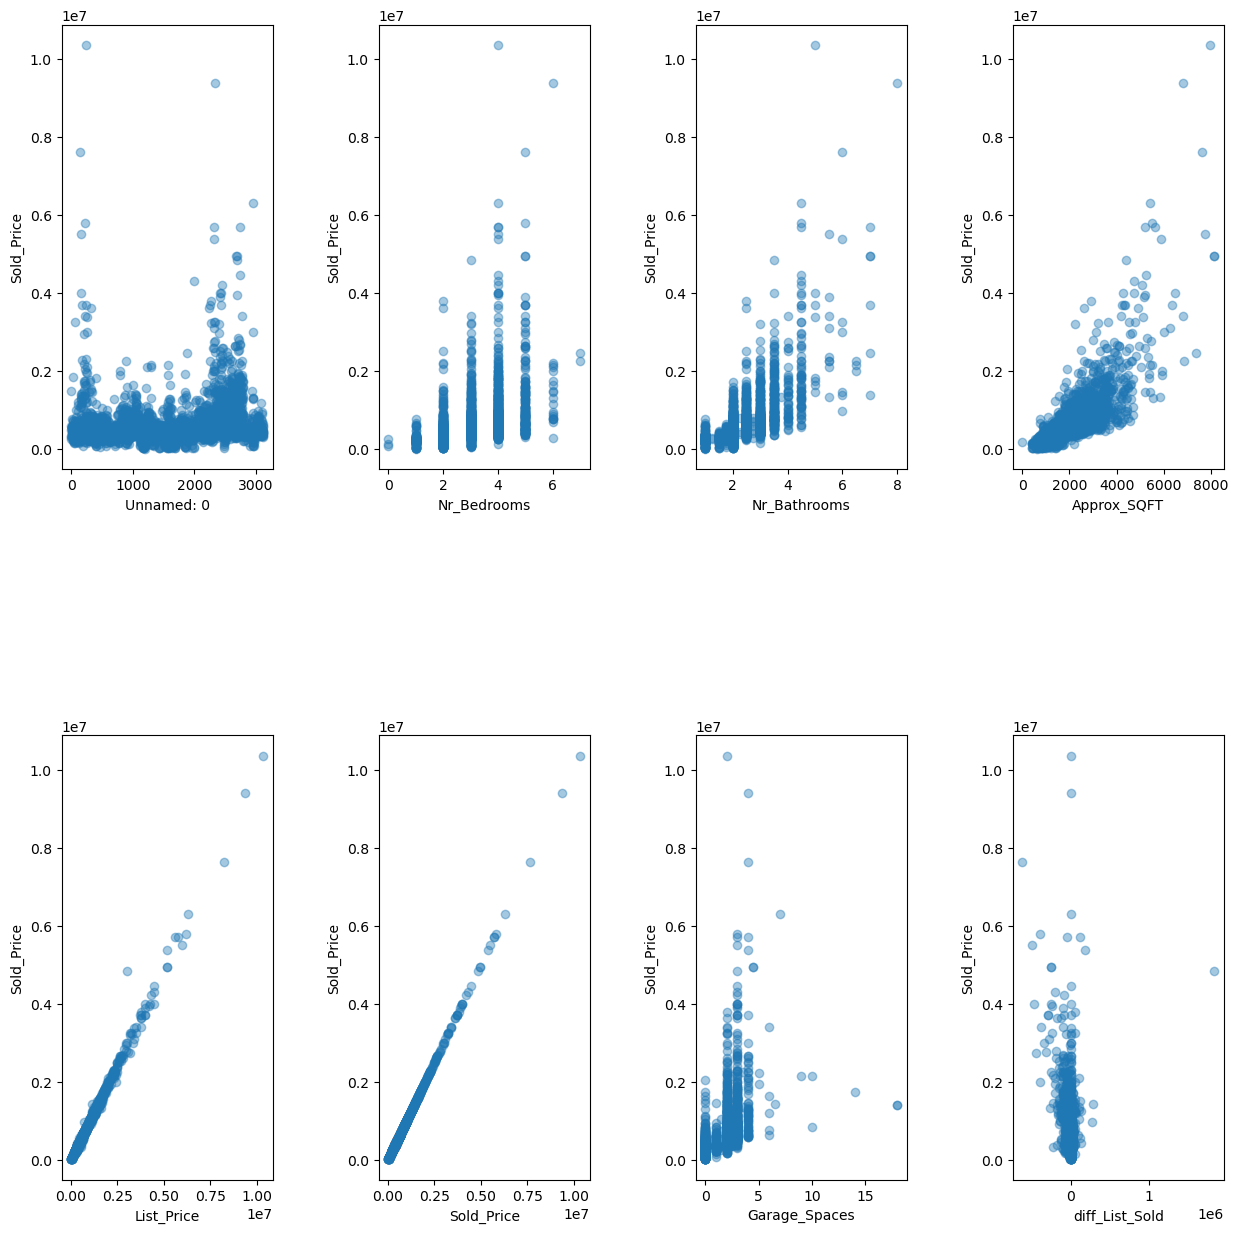

In [345]:
scatterplots(features, ncol=4, figsize=(15, 15))

**In the scatterplots I see some high correlations. There is a strong positive correlation with Approx_SQFT, Nr_Bathrooms, Nr_Bedrooms and Garage Spaces. Further analysis is necessary to build a model to predict Sold_Price based on given features**